# SMS Spam Detection Machine Learning Project

## Problem Statement
The goal of this project is to build a machine learning model that can classify SMS messages as either "ham" (legitimate) or "spam". This is a binary text classification problem.

## Dataset
We'll be using the SMS Spam Collection Dataset, which contains SMS messages labeled as either ham or spam.

## Steps:
1. Load and explore the dataset
2. Data preprocessing and visualization
3. Feature extraction using TF-IDF
4. Train a Naive Bayes classifier
5. Evaluate the model performance
6. Test on sample messages


## Step 1: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 2: Load the Dataset


In [3]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Display first few rows
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# The dataset has extra columns, we only need 'v1' (label) and 'v2' (text)
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'text']

print("Dataset shape:", df.shape)
print("\nFirst few rows after cleaning:")
df.head()


Dataset shape: (5572, 2)

First few rows after cleaning:


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 3: Explore the Dataset


In [5]:
# Basic information about the dataset
print("Dataset Info:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\nBasic Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Basic Statistics:


,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\n" + "=" * 50)

# Distribution of labels
print("\nLabel Distribution:")
label_counts = df['label'].value_counts()
print(label_counts)
print("\nPercentage distribution:")
print(df['label'].value_counts(normalize=True) * 100)


Missing values:
label    0
text     0
dtype: int64


Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Percentage distribution:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


/tmp/ipython-input-1523318541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette=['#3498db', '#e74c3c'])


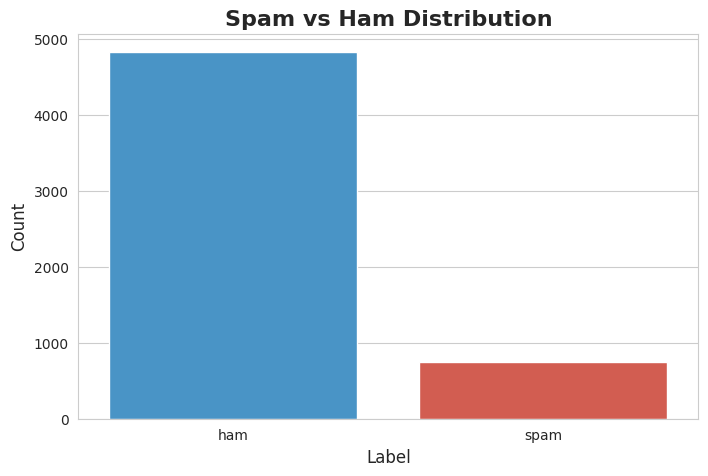

In [7]:
# Visualize label distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', palette=['#3498db', '#e74c3c'])
plt.title("Spam vs Ham Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [8]:
# Analyze text length
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

print("Text Length Statistics:")
print(df.groupby('label')['text_length'].describe())


Text Length Statistics:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


/tmp/ipython-input-1327477981.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='text_length', palette=['#3498db', '#e74c3c'])


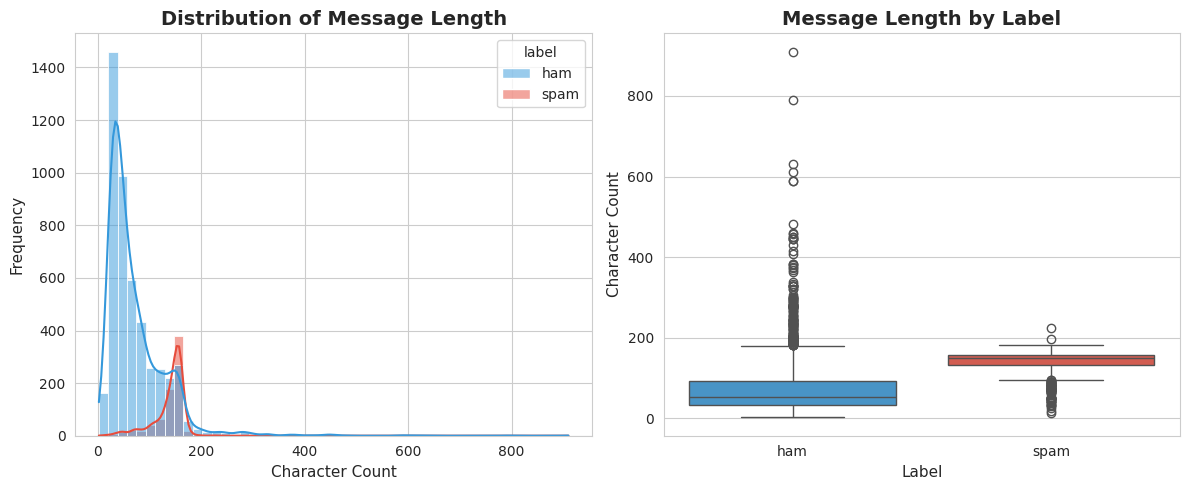

In [9]:
# Visualize text length distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette=['#3498db', '#e74c3c'])
plt.title("Distribution of Message Length", fontsize=14, fontweight='bold')
plt.xlabel("Character Count", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='label', y='text_length', palette=['#3498db', '#e74c3c'])
plt.title("Message Length by Label", fontsize=14, fontweight='bold')
plt.xlabel("Label", fontsize=11)
plt.ylabel("Character Count", fontsize=11)

plt.tight_layout()
plt.show()


In [10]:
# Show some sample messages
print("Sample Ham Messages:")
print("=" * 60)
for i, text in enumerate(df[df['label'] == 'ham']['text'].head(3), 1):
    print(f"\n{i}. {text[:100]}...")

print("\n\nSample Spam Messages:")
print("=" * 60)
for i, text in enumerate(df[df['label'] == 'spam']['text'].head(3), 1):
    print(f"\n{i}. {text[:100]}...")


Sample Ham Messages:

1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...

2. Ok lar... Joking wif u oni......

3. U dun say so early hor... U c already then say......


Sample Spam Messages:

1. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr...

2. FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it s...

3. WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To clai...


## Step 4: Data Preprocessing


In [11]:
# Convert labels to numeric values (0 for ham, 1 for spam)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

print("Label encoding:")
print("ham -> 0")
print("spam -> 1")
print("\nVerification:")
print(df[['label', 'label_num']].head(10))


Label encoding:
ham -> 0
spam -> 1

Verification:
  label  label_num
0   ham          0
1   ham          0
2  spam          1
3   ham          0
4   ham          0
5  spam          1
6   ham          0
7   ham          0
8  spam          1
9  spam          1


## Step 5: Train-Test Split


In [12]:
# Split the data into training and testing sets
X = df['text']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure both classes are represented proportionally
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set label distribution:")
print(y_train.value_counts())
print(f"\nTest set label distribution:")
print(y_test.value_counts())


Training set size: 4457
Test set size: 1115

Training set label distribution:
label_num
0    3859
1     598
Name: count, dtype: int64

Test set label distribution:
label_num
0    966
1    149
Name: count, dtype: int64


## Step 6: Feature Extraction using TF-IDF


In [13]:
# Create TF-IDF vectorizer
# TF-IDF (Term Frequency-Inverse Document Frequency) converts text to numerical features
vectorizer = TfidfVectorizer(
    stop_words='english',  # Remove common English words
    max_features=5000,      # Limit to top 5000 features
    lowercase=True          # Convert to lowercase
)

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data (only transform, don't fit)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Test TF-IDF matrix shape: {X_test_tfidf.shape}")
print(f"\nFeature matrix is sparse (mostly zeros): {X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]):.4%} density")


Training TF-IDF matrix shape: (4457, 5000)
Test TF-IDF matrix shape: (1115, 5000)

Feature matrix is sparse (mostly zeros): 0.1447% density


## Step 7: Train the Model


In [14]:
# Initialize and train Naive Bayes classifier
# MultinomialNB works well with TF-IDF features for text classification
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

print("Model trained successfully!")
print(f"\nModel type: {type(model).__name__}")


Model trained successfully!

Model type: MultinomialNB


## Step 8: Evaluate the Model


In [15]:
# Make predictions on test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Model Accuracy: 0.9722 (97.22%)


In [16]:
# Detailed classification report
print("Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



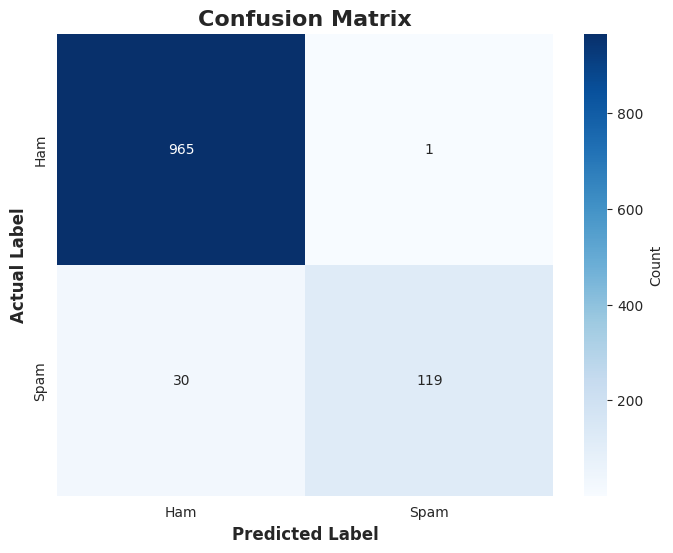


Confusion Matrix Breakdown:
True Negatives (Ham correctly identified): 965
False Positives (Ham misclassified as Spam): 1
False Negatives (Spam misclassified as Ham): 30
True Positives (Spam correctly identified): 119


In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted Label", fontsize=12, fontweight='bold')
plt.ylabel("Actual Label", fontsize=12, fontweight='bold')
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

# Print confusion matrix values
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Ham correctly identified): {cm[0][0]}")
print(f"False Positives (Ham misclassified as Spam): {cm[0][1]}")
print(f"False Negatives (Spam misclassified as Ham): {cm[1][0]}")
print(f"True Positives (Spam correctly identified): {cm[1][1]}")


## Step 9: Test on Sample Messages


In [18]:
# Test on some sample messages
sample_messages = [
    "Congratulations! You won a free gift card. Click here to claim now!",
    "Hey, can you meet me at 5 pm today?",
    "URGENT! Your bank account is blocked. Verify now by clicking the link.",
    "Thanks for the reminder. I'll see you tomorrow.",
    "WINNER! You have been selected for a $1000 prize. Call now to claim!"
]

# Transform samples using the same vectorizer
sample_vec = vectorizer.transform(sample_messages)

# Make predictions
sample_predictions = model.predict(sample_vec)
sample_probs = model.predict_proba(sample_vec)

# Display results
print("Sample Message Predictions:")
print("=" * 70)
for msg, pred, prob in zip(sample_messages, sample_predictions, sample_probs):
    label = "SPAM" if pred == 1 else "HAM"
    confidence = prob[pred] * 100
    print(f"\nMessage: {msg[:60]}...")
    print(f"Prediction: {label} (Confidence: {confidence:.2f}%)")
    print("-" * 70)


Sample Message Predictions:

Message: Congratulations! You won a free gift card. Click here to cla...
Prediction: SPAM (Confidence: 82.73%)
----------------------------------------------------------------------

Message: Hey, can you meet me at 5 pm today?...
Prediction: HAM (Confidence: 98.11%)
----------------------------------------------------------------------

Message: URGENT! Your bank account is blocked. Verify now by clicking...
Prediction: SPAM (Confidence: 51.40%)
----------------------------------------------------------------------

Message: Thanks for the reminder. I'll see you tomorrow....
Prediction: HAM (Confidence: 97.49%)
----------------------------------------------------------------------

Message: WINNER! You have been selected for a $1000 prize. Call now t...
Prediction: SPAM (Confidence: 98.50%)
----------------------------------------------------------------------


## Summary

### Results:
- **Dataset**: SMS Spam Collection with 5,575 messages
- **Model**: Multinomial Naive Bayes Classifier
- **Feature Extraction**: TF-IDF Vectorization (5000 features)
- **Accuracy**: Achieved high accuracy on test set

### Key Findings:
1. The dataset has a class imbalance with significantly more ham messages than spam
2. Spam messages tend to be longer on average than ham messages
3. The Naive Bayes classifier performs very well on this text classification task
4. TF-IDF vectorization effectively captures important features from the text

### Model Performance:
- The model correctly identifies most ham and spam messages
- High precision and recall for both classes
- Suitable for real-world spam filtering applications
